## Import Pandas and read CSV file

In [1]:
import pandas as pd

In [2]:
dz64 = pd.read_csv('dangerzone_2564.csv')
dz65 = pd.read_csv('dangerzone_2565.csv')

# Assign each region into values

In [3]:
name_to_value = {
    'กรุงธนใต้': 1,
    'กรุงธนเหนือ': 2,
    'กรุงเทพตะวันออก': 3,
    'กรุงเทพกลาง': 4,
    'กรุงเทพใต้': 5,
    'กรุงเทพเหนือ': 6
}

# Use the map function to create a new column with the assigned values
dz64['rg64_value'] = dz64['d_zone'].map(name_to_value)

In [4]:
grouped_data = dz64.groupby('rg64_value')['district'].apply(list).reset_index()

# Add a column with the names of the d_zone values
grouped_data['d_zone_name'] = grouped_data['rg64_value'].map({1: 'กรุงธนใต้', 2: 'กรุงธนเหนือ', 3: 'กรุงเทพตะวันออก', 4: 'กรุงเทพกลาง', 5: 'กรุงเทพใต้', 6: 'กรุงเทพเหนือ'})
grouped_data

,rg64_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


## Drop irrelevant columns.

In [5]:
columns_to_drop = ['_id', 'n_id', 'adddate', 'updatedate']
dz64 = dz64.drop(columns=columns_to_drop)


In [6]:
dz64.head() #check dropped columns 

,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,coordinate_police,traffic_officer,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,rg64_value
0,2564,กรุงธนใต้,หนองแขม,13,13,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2564,กรุงธนใต้,ราษฎร์บูรณะ,6,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2564,กรุงธนใต้,ภาษีเจริญ,11,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2564,กรุงธนใต้,บางบอน,17,12,3,2,0,0,0,...,5,5,0,0,0,0,0,0,0,1
4,2564,กรุงธนใต้,บางแค,11,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Exclude columns from sum 

In [8]:
# List of columns to exclude from the sum
exclude_columns = ['year', 'd_zone', 'district', 'rg64_value']

# Calculate the sum of columns, excluding the specified ones
dz64['total_score'] = dz64.drop(columns=exclude_columns).sum(axis=1)


In [9]:
dz64.head() #check new column

,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,traffic_officer,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,rg64_value,total_score
0,2564,กรุงธนใต้,หนองแขม,13,13,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,67
1,2564,กรุงธนใต้,ราษฎร์บูรณะ,6,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,35
2,2564,กรุงธนใต้,ภาษีเจริญ,11,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,99
3,2564,กรุงธนใต้,บางบอน,17,12,3,2,0,0,0,...,5,0,0,0,0,0,0,0,1,94
4,2564,กรุงธนใต้,บางแค,11,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,59


# Find the highest and lowest total scores

In [10]:
highest_total_score = dz64['total_score'].max()
lowest_total_score = dz64['total_score'].min()

print(f'Highest Total Score: {highest_total_score}')
print(f'Lowest Total Score: {lowest_total_score}')

Highest Total Score: 168
Lowest Total Score: 22


# Define the rating range (0 to 200)

In [11]:
rating_range_min = 0
rating_range_max = 200

# Define the number of ratings
num_ratings = 5

# Calculate the step size for each rating
step_size = (rating_range_max - rating_range_min) / num_ratings

# Define rating ranges based on step size
rating_ranges = [
    (int(rating_range_min + i * step_size), int(rating_range_min + (i + 1) * step_size))
    for i in range(num_ratings)
]

# Function to assign ratings based on the score
def assign_rating(total_score):
    for rating, rating_range in enumerate(rating_ranges, start=1):
        if rating_range[0] <= total_score <= rating_range[1]:
            return f'{rating_range[0]}-{rating_range[1]}', rating
    return 'Unknown', 0  # In case the score doesn't fall into any range

# Apply the function to create the 'range' and 'rating' columns
dz64[['range', 'rating']] = dz64['total_score'].apply(assign_rating).apply(pd.Series)

In [12]:
# Save the DataFrame to a CSV file
dz64.to_csv('dz64.csv', index=False)

In [13]:
#check data with range and rating
dz64.head()

,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,rg64_value,total_score,range,rating
0,2564,กรุงธนใต้,หนองแขม,13,13,0,0,0,0,0,...,1,0,0,0,0,0,1,67,40-80,2
1,2564,กรุงธนใต้,ราษฎร์บูรณะ,6,5,0,0,0,1,0,...,0,0,0,0,0,0,1,35,0-40,1
2,2564,กรุงธนใต้,ภาษีเจริญ,11,11,0,0,0,0,0,...,0,0,0,0,0,0,1,99,80-120,3
3,2564,กรุงธนใต้,บางบอน,17,12,3,2,0,0,0,...,0,0,0,0,0,0,1,94,80-120,3
4,2564,กรุงธนใต้,บางแค,11,11,0,0,0,0,0,...,0,0,0,0,0,0,1,59,40-80,2


# Use RandomForest Classification to trainmodel

In [16]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the feature matrix and target variable
X = dz64[['rg64_value', 'total_score']]
y = dz64['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and the confusion matrix
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         6
           3       0.50      1.00      0.67         1
           4       1.00      0.67      0.80         3

   micro avg       0.90      0.90      0.90        10
   macro avg       0.83      0.89      0.82        10
weighted avg       0.95      0.90      0.91        10

Confusion Matrix:
 [[6 0 0]
 [0 1 0]
 [0 1 2]]


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


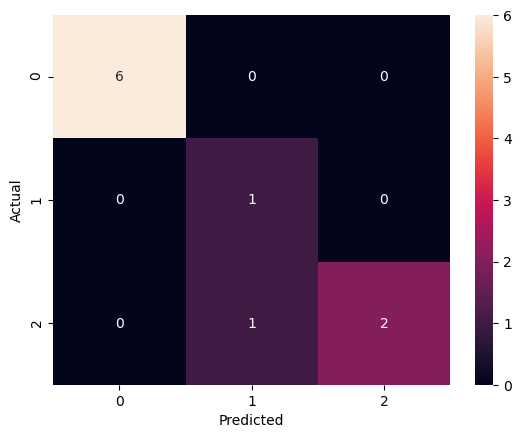

In [17]:
# Use seaborn to create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### The value 6 in the top-left corner represents True Positives (TP), indicating that the model correctly predicted 6 instances with a rating of 2.
#### The value 1 in the middle of the matrix represents True Positives (TP), indicating that the model correctly predicted 1 instance with a rating of 3.
#### The value 2 in the bottom-right corner represents True Positives (TP), indicating that the model correctly predicted 2 instances with a rating of 4.
#### The matrix's other values (zeros) represent True Negatives (TN), False Positives (FP), and False Negatives (FN).
#### The accuracy, precision, recall, and F1-score from the classification report provide additional insights into the model's performance for each class.

#### Overall, it seems that model is performing well with high accuracy, particularly for class 2.

## Use The Same Model to predict rating of dz65 = pd.read_csv('dangerzone_2565.csv')

In [19]:
dz65.head() #check the columns

,_id,n_id,year,d_zone,district,area,public_place,private,official_place,temple_area,...,traffic_officer,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,adddate,updatedate
0,1,50,2565,กรุงธนใต้,หนองแขม,1,1,0,0,0,...,0,0,0,0,1,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
1,2,49,2565,กรุงธนใต้,ราษฎร์บูรณะ,1,1,0,0,0,...,0,0,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
2,3,48,2565,กรุงธนใต้,ภาษีเจริญ,6,6,0,0,0,...,0,0,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
3,4,47,2565,กรุงธนใต้,บางบอน,4,3,0,1,0,...,0,1,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
4,5,46,2565,กรุงธนใต้,บางแค,9,9,0,0,0,...,0,0,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00


# Assign each region into values 

In [20]:
name_to_value = {
    'กรุงธนใต้': 1,
    'กรุงธนเหนือ': 2,
    'กรุงเทพตะวันออก': 3,
    'กรุงเทพกลาง': 4,
    'กรุงเทพใต้': 5,
    'กรุงเทพเหนือ': 6
}

# Use the map function to create a new column with the assigned values
dz65['rg65_value'] = dz65['d_zone'].map(name_to_value)

## Group regions and districts together

In [21]:
grouped_data = dz65.groupby('rg65_value')['district'].apply(list).reset_index()

# Add a column with the names of the d_zone values
grouped_data['d_zone_name'] = grouped_data['rg65_value'].map({1: 'กรุงธนใต้', 2: 'กรุงธนเหนือ', 3: 'กรุงเทพตะวันออก', 4: 'กรุงเทพกลาง', 5: 'กรุงเทพใต้', 6: 'กรุงเทพเหนือ'})
grouped_data

,rg65_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


## Drop unneccessary columns

In [23]:
columns_to_drop = ['_id', 'n_id', 'adddate', 'updatedate']
dz65 = dz65.drop(columns=columns_to_drop)

In [24]:
dz65.head() #check column

,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,coordinate_police,traffic_officer,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,rg65_value
0,2565,กรุงธนใต้,หนองแขม,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2565,กรุงธนใต้,ราษฎร์บูรณะ,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2565,กรุงธนใต้,ภาษีเจริญ,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2565,กรุงธนใต้,บางบอน,4,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2565,กรุงธนใต้,บางแค,9,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Exclude columns from sum 

In [25]:
# List of columns to exclude from the sum
exclude_columns = ['year', 'd_zone', 'district', 'rg65_value']

# Calculate the sum of columns, excluding the specified ones
dz65['total_score'] = dz65.drop(columns=exclude_columns).sum(axis=1)
dz65.to_csv('dz65.csv', index=False)

# Check to see the result,now we have total scores for each district
dz65.head()


,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,traffic_officer,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,rg65_value,total_score
0,2565,กรุงธนใต้,หนองแขม,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,7
1,2565,กรุงธนใต้,ราษฎร์บูรณะ,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7
2,2565,กรุงธนใต้,ภาษีเจริญ,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,44
3,2565,กรุงธนใต้,บางบอน,4,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,38
4,2565,กรุงธนใต้,บางแค,9,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,52


# Find the highest and lowest total scores

In [26]:
highest_total_score = dz65['total_score'].max()
lowest_total_score = dz65['total_score'].min()

print(f'Highest Total Score: {highest_total_score}')
print(f'Lowest Total Score: {lowest_total_score}')

Highest Total Score: 134
Lowest Total Score: 7


## Create new dataframe for predicting the rating of dangerzone_2565 csv file/dz65 by using the same model (RandomForest Classification) we'd trained from dz64

In [39]:
# Load the new data (replace 'new_data.csv' with the actual file name)
new_data = pd.read_csv('dz65.csv')

# Prepare the feature matrix with the same columns
X_new = new_data[['rg65_value', 'total_score']]

# Use the trained model to predict ratings for the new data
predicted_ratings = model.predict(X_new)

# Add the predicted ratings to the new DataFrame
new_data['predicted_rating'] = predicted_ratings
new_data.to_csv('new_data.csv', index=False)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [40]:
new_data.head()
#check the result, now we have predicted_rating column from the model 

,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,rg65_value,total_score,predicted_rating
0,2565,กรุงธนใต้,หนองแขม,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,7,1
1,2565,กรุงธนใต้,ราษฎร์บูรณะ,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7,1
2,2565,กรุงธนใต้,ภาษีเจริญ,6,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,44,2
3,2565,กรุงธนใต้,บางบอน,4,3,0,1,0,0,0,...,1,0,0,0,0,0,0,1,38,1
4,2565,กรุงธนใต้,บางแค,9,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,52,2


## Check Accuracy by calculating actual_rating and range 

In [41]:
# Define the rating range (0 to 500)
rating_range_min = 0
rating_range_max = 200

# Define the number of ratings
num_ratings = 5

# Calculate the step size for each rating
step_size = (rating_range_max - rating_range_min) / num_ratings

# Define rating ranges based on step size
rating_ranges = [
    (int(rating_range_min + i * step_size), int(rating_range_min + (i + 1) * step_size))
    for i in range(num_ratings)
]

# Function to assign ratings based on the score
def assign_rating(total_score):
    for rating, rating_range in enumerate(rating_ranges, start=1):
        if rating_range[0] <= total_score <= rating_range[1]:
            return f'{rating_range[0]}-{rating_range[1]}', rating
    return 'Unknown', 0  # In case the score doesn't fall into any range

# Apply the function to create the 'range' and 'rating' columns
new_data[['range', 'actual_rating']] = new_data['total_score'].apply(assign_rating).apply(pd.Series)
new_data.to_csv('new_data.csv', index=False)

In [55]:
#check the result
new_data.head()
# now ,we have range and actual_rating in the new dataframe we created

,year,d_zone,district,area,public_place,private,official_place,temple_area,state_enterprise,elsewhere,...,d_data,punishment,pave_mainten,legal_action,other_spec2,rg65_value,total_score,predicted_rating,range,actual_rating
0,2565,กรุงธนใต้,หนองแขม,1,1,0,0,0,0,0,...,0,1,0,0,0,1,7,1,0-40,1
1,2565,กรุงธนใต้,ราษฎร์บูรณะ,1,1,0,0,0,0,0,...,0,0,0,0,0,1,7,1,0-40,1
2,2565,กรุงธนใต้,ภาษีเจริญ,6,6,0,0,0,0,0,...,0,0,0,0,0,1,44,2,40-80,2
3,2565,กรุงธนใต้,บางบอน,4,3,0,1,0,0,0,...,0,0,0,0,0,1,38,1,0-40,1
4,2565,กรุงธนใต้,บางแค,9,9,0,0,0,0,0,...,0,0,0,0,0,1,52,2,40-80,2


## Evaluate the trained model 

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Extract the 'predicted_rating' and 'actual_rating' columns
predicted_ratings = new_data['predicted_rating']
actual_ratings = new_data['actual_rating']

# Calculate accuracy
accuracy = accuracy_score(actual_ratings, predicted_ratings)
print(f"Accuracy: {accuracy}")

# Generate a classification report
classification_rep = classification_report(actual_ratings, predicted_ratings)
print("Classification Report:\n", classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(actual_ratings, predicted_ratings)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           1       0.89      1.00      0.94        25
           2       1.00      0.84      0.91        19
           3       0.80      1.00      0.89         4
           4       1.00      0.50      0.67         2

   micro avg       0.92      0.92      0.92        50
   macro avg       0.92      0.84      0.85        50
weighted avg       0.93      0.92      0.92        50

Confusion Matrix:
 [[25  0  0  0]
 [ 3 16  0  0]
 [ 0  0  4  0]
 [ 0  0  1  1]]


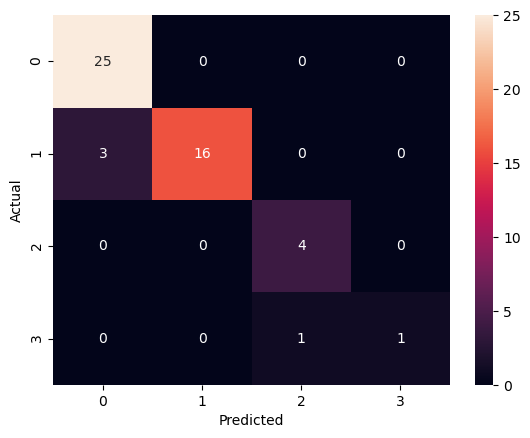

In [34]:
# Use seaborn to create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Accuracy: 0.92
#### Precision: Precision measures how many of the predicted positive cases were actually positive. For class 1, it's 0.89, and for class 2, it's 1.0, which means high precision for these classes.
#### Recall: Recall measures how many of the actual positive cases were correctly predicted. For class 1, it's 1.0, indicating that the model captures all positive cases. For class 2, it's 0.84.
#### F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two. Class 1 has an F1-score of 0.94, indicating a good balance.
#### The model performs well in distinguishing class 1 and class 2, and it still maintains reasonable performance for class 3 and class 4.

#### Overall, these metrics suggest that classification model is effective in classifying data into different classes.

###### The top-left value, 25, indicates that there were 25 true positive predictions for class 1.
###### The top-right value, 0, indicates that there were no false positive predictions for class 1.
###### The bottom-left value, 3, indicates that there were 3 false negative predictions for class 2.
###### The bottom-right value, 16, indicates that there were 16 true positive predictions for class 2.
###### The value 4 in the bottom-right of the matrix indicates that there were 4 true positive predictions for class 3.
###### The value 1 in the bottom-right of the matrix indicates that there was 1 false negative prediction for class 4.
###### The rest of the values are zeros, indicating that there were no other false positive or false negative predictions for the respective classes.
###### In summary, this confusion matrix shows the model's performance in classifying data into one of the four classes (1, 2, 3, and 4). It tells how many predictions were correct and how many were incorrect for each class.

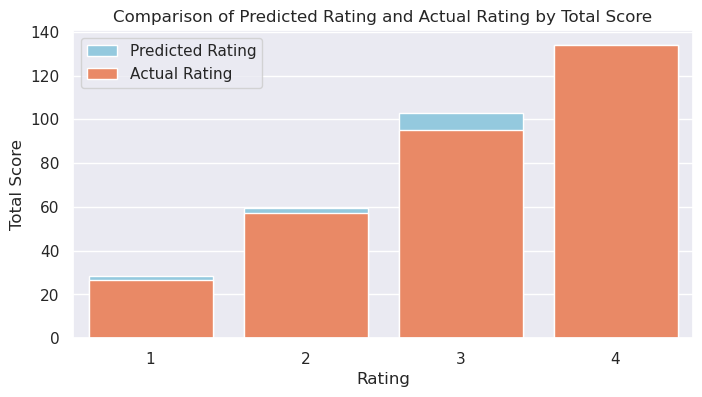

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'new_data.csv' data
new_data = pd.read_csv('new_data.csv')

# Set the style for Seaborn (optional)
sns.set(style="darkgrid")

# Create a bar graph for 'predicted_rating' and 'actual_rating' vs. 'total_score'
plt.figure(figsize=(8, 4))

sns.barplot(x='predicted_rating', y='total_score', data=new_data, color='skyblue', label='Predicted Rating', ci=None)
sns.barplot(x='actual_rating', y='total_score', data=new_data, color='coral', label='Actual Rating', ci=None)

# Set labels and title
plt.xlabel("Rating")
plt.ylabel("Total Score")
plt.title("Comparison of Predicted Rating and Actual Rating by Total Score")

# Show the legend
plt.legend()

# Show the plot
plt.xticks(rotation=0)
plt.show()


## 5 high_dangerzone based on rating

In [87]:
# Load the data (replace 'new_data.csv' with the actual file name)
new_data = pd.read_csv('new_data.csv')

# Sort the DataFrame by 'total_score' in descending order and select the top 5 rows
top_5 = new_data.sort_values(by='total_score', ascending=False).head(5)

# Select the specified columns for the top 5 rows
high_dangerzone = top_5[['district','d_zone','rg65_value','total_score', 'predicted_rating', 'range', 'actual_rating']]
high_dangerzone

,district,d_zone,rg65_value,total_score,predicted_rating,range,actual_rating
16,สะพานสูง,กรุงเทพตะวันออก,3,134,4,120-160,4
38,ปทุมวัน,กรุงเทพใต้,5,134,3,120-160,4
40,บางนา,กรุงเทพใต้,5,99,3,80-120,3
28,พระนคร,กรุงเทพกลาง,4,99,3,80-120,3
25,สัมพันธวงศ์,กรุงเทพกลาง,4,93,3,80-120,3


## 5 low_dangerzone based on rating 

In [89]:
# Load the data (replace 'new_data.csv' with the actual file name)
new_data = pd.read_csv('new_data.csv')

# Sort the DataFrame by 'total_score' in descending order and select the top 5 rows
top_5 = new_data.sort_values(by='total_score', ascending=True).head(5)

# Select the specified columns for the top 5 rows
low_dangerzone = top_5[['district','d_zone','rg65_value','total_score', 'predicted_rating', 'range', 'actual_rating']]
low_dangerzone

,district,d_zone,rg65_value,total_score,predicted_rating,range,actual_rating
0,หนองแขม,กรุงธนใต้,1,7,1,0-40,1
1,ราษฎร์บูรณะ,กรุงธนใต้,1,7,1,0-40,1
6,ทุ่งครุ,กรุงธนใต้,1,8,1,0-40,1
17,ลาดกระบัง,กรุงเทพตะวันออก,3,10,1,0-40,1
10,ธนบุรี,กรุงธนเหนือ,2,10,1,0-40,1


## source: https://data.bangkok.go.th/dataset/cl_605c19830663f/resource/cec0b07a-3384-4675-9764-12c52d28f851